# Tutorial: Machine Learning in scikit-learn
From the [Izaskun Mendia], the GitHub repository (https://github.com/izmendi/)

![Machine learning](images/01_robot.png)

# PANDAS

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np

# Series

In [2]:
index = ['a','b','c','d','e']

In [3]:
pd.Series(np.arange(5), index=index)

a    0
b    1
c    2
d    3
e    4
dtype: int32

In [4]:
series = pd.Series(np.arange(5), index=index)

In [5]:
series['a'], series['b']

(0, 1)

In [6]:
series[:2]

a    0
b    1
dtype: int32

In [7]:
series[-2:]

d    3
e    4
dtype: int32

# DataFrame

* Dataframe is dict like, you can index column names or lists of column names
* df.ix gives you numpy like indexing semantics.
* avoid integer column names
* The first dimension is the index.  Subsequent dimensions are the columns

In [8]:
df = pd.DataFrame({'a' : np.random.random(5), 'number 2' : np.random.random(5)})
print df

          a  number 2
0  0.555259  0.944573
1  0.383585  0.643185
2  0.660946  0.714106
3  0.187174  0.266773
4  0.371899  0.233651


In [9]:
df['a']

0    0.555259
1    0.383585
2    0.660946
3    0.187174
4    0.371899
Name: a, dtype: float64

In [10]:
df.loc[2]

a           0.660946
number 2    0.714106
Name: 2, dtype: float64

In [11]:
df.iloc[2]

a           0.660946
number 2    0.714106
Name: 2, dtype: float64

In [12]:
df.loc[2,['a']]

a    0.660946
Name: 2, dtype: float64

In [13]:
df.ix[:3]

,a,number 2
0,0.555259,0.944573
1,0.383585,0.643185
2,0.660946,0.714106
3,0.187174,0.266773


In [14]:
df = pd.DataFrame({'a' : np.random.random(5), 'b':np.random.random(5), 'c' : np.random.random(5)}, index=['one', 'two', 'three', 'four', 'five'])
df

,a,b,c
one,0.141148,0.919225,0.288947
two,0.907250,0.293904,0.953328
three,0.336022,0.220898,0.443280
four,0.382714,0.088646,0.802888
five,0.503646,0.556805,0.965950


In [15]:
df.ix['two':'five']

,a,b,c
two,0.907250,0.293904,0.953328
three,0.336022,0.220898,0.443280
four,0.382714,0.088646,0.802888
five,0.503646,0.556805,0.965950


# Indexing by Datetime

To learn more about the frequency strings, please see [this link](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases)

In [16]:
n_periods = 10
rng = pd.date_range('1/10/2016', periods=n_periods, freq='M')
print rng

DatetimeIndex(['2016-01-31', '2016-02-29', '2016-03-31', '2016-04-30',
               '2016-05-31', '2016-06-30', '2016-07-31', '2016-08-31',
               '2016-09-30', '2016-10-31'],
              dtype='datetime64[ns]', freq='M')


In [17]:
df = pd.DataFrame(np.random.randint(0,100,size=(n_periods, 4)), columns=list('ABCD'))
df.head()

,A,B,C,D
0,19,21,98,74
1,51,45,18,62
2,31,27,68,94
3,93,99,13,83
4,18,22,5,42


In [18]:
df.index = rng
df.head()

,A,B,C,D
2016-01-31,19,21,98,74
2016-02-29,51,45,18,62
2016-03-31,31,27,68,94
2016-04-30,93,99,13,83
2016-05-31,18,22,5,42


In [19]:
df['E'] = np.random.randint(0,100,size=n_periods)
df.head()

,A,B,C,D,E
2016-01-31,19,21,98,74,22
2016-02-29,51,45,18,62,20
2016-03-31,31,27,68,94,93
2016-04-30,93,99,13,83,39
2016-05-31,18,22,5,42,9


In [20]:
df[df.index>'2016-01-10 00:07:00']

,A,B,C,D,E
2016-01-31,19,21,98,74,22
2016-02-29,51,45,18,62,20
2016-03-31,31,27,68,94,93
2016-04-30,93,99,13,83,39
2016-05-31,18,22,5,42,9
2016-06-30,67,85,13,92,1
2016-07-31,76,3,37,90,52
2016-08-31,22,31,59,31,83
2016-09-30,41,88,79,25,9
2016-10-31,12,84,98,71,15


**Applying functions is also quite stright-forward**

In [21]:
my_func = lambda x: x+1

In [22]:
my_func(4)

5

In [23]:
df.D.apply(lambda D: D+1)

2016-01-31    75
2016-02-29    63
2016-03-31    95
2016-04-30    84
2016-05-31    43
2016-06-30    93
2016-07-31    91
2016-08-31    32
2016-09-30    26
2016-10-31    72
Freq: M, Name: D, dtype: int64

**It's also easy to summarize your data**

In [24]:
df['A'].count()

10

In [25]:
df['A'].min()

12

In [26]:
df['A'].max()

93

In [27]:
df['A'].mean()

43.0

In [28]:
df.min(axis=0)

A    12
B     3
C     5
D    25
E     1
dtype: int32

In [29]:
df.min(axis=1)

2016-01-31    19
2016-02-29    18
2016-03-31    27
2016-04-30    13
2016-05-31     5
2016-06-30     1
2016-07-31     3
2016-08-31    22
2016-09-30     9
2016-10-31    12
Freq: M, dtype: int32

In [30]:
df.isnull().count()

A    10
B    10
C    10
D    10
E    10
dtype: int64

**What can we do when we don't have info? **

In [31]:
series = pd.Series([1,2,np.nan,4,np.nan,6,np.nan,8,np.nan,10])
series

0     1.0
1     2.0
2     NaN
3     4.0
4     NaN
5     6.0
6     NaN
7     8.0
8     NaN
9    10.0
dtype: float64

In [32]:
series.isnull()

0    False
1    False
2     True
3    False
4     True
5    False
6     True
7    False
8     True
9    False
dtype: bool

In [33]:
series.fillna(series.mean())

0     1.000000
1     2.000000
2     5.166667
3     4.000000
4     5.166667
5     6.000000
6     5.166667
7     8.000000
8     5.166667
9    10.000000
dtype: float64

In [34]:
series.fillna(series.interpolate())

0     1.0
1     2.0
2     3.0
3     4.0
4     5.0
5     6.0
6     7.0
7     8.0
8     9.0
9    10.0
dtype: float64

In [35]:
series.fillna(method='pad')

0     1.0
1     2.0
2     2.0
3     4.0
4     4.0
5     6.0
6     6.0
7     8.0
8     8.0
9    10.0
dtype: float64

In [36]:
series.dropna()

0     1.0
1     2.0
3     4.0
5     6.0
7     8.0
9    10.0
dtype: float64

**Dataframes and series play nice with plotting**

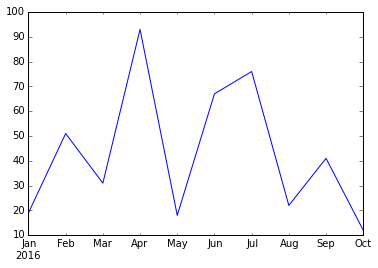

In [37]:
df['A'].plot()

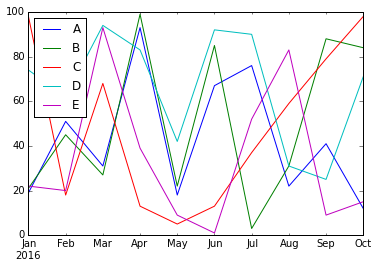

In [38]:
df.plot()

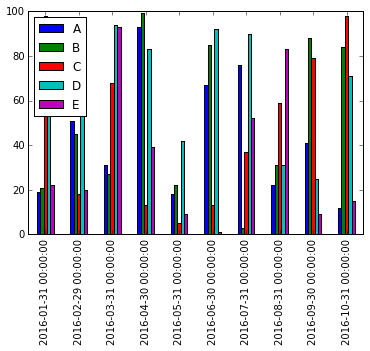

In [39]:
df.plot(kind='bar')

**Convenience method for frequency conversion and resampling of time series. Object must have a datetime-like index**

In [40]:
my_df = df.resample('2M').sum()
my_df

,A,B,C,D,E
2016-01-31,19,21,98,74,22
2016-03-31,82,72,86,156,113
2016-05-31,111,121,18,125,48
2016-07-31,143,88,50,182,53
2016-09-30,63,119,138,56,92
2016-11-30,12,84,98,71,15


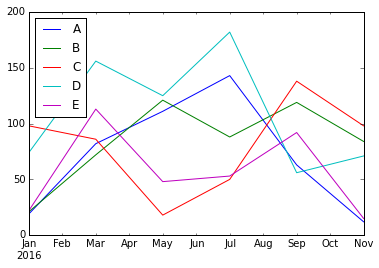

In [41]:
my_df.plot()

**Generate various summary statistics, excluding NaN values.**

In [42]:
df.describe()

,A,B,C,D,E
count,10.000000,10.000000,10.000000,10.000000,10.000000
mean,43.000000,50.500000,48.800000,66.400000,34.300000
std,27.848798,34.916567,36.202517,25.626375,32.093786
min,12.000000,3.000000,5.000000,25.000000,1.000000
25%,19.750000,23.250000,14.250000,47.000000,10.500000
50%,36.000000,38.000000,48.000000,72.500000,21.000000
75%,63.000000,84.750000,76.250000,88.250000,48.750000
max,93.000000,99.000000,98.000000,94.000000,93.000000
